In [1]:
import pandas as pd

In [2]:
df_berlin = pd.read_csv('processed/berlin_cleaned.csv')

In [3]:
df_berlin

,day,temperature,rain,snowfall,sunshine_hours,month_year,year,month_num,season
0,2015-06-16,12.3,0.0,0.0,4.752539,2015-06,2015,6,summer
1,2015-06-17,15.2,0.5,0.0,12.985506,2015-06,2015,6,summer
2,2015-06-18,15.9,4.2,0.0,8.459533,2015-06,2015,6,summer
3,2015-06-19,14.3,0.1,0.0,14.672567,2015-06,2015,6,summer
4,2015-06-20,13.8,3.1,0.0,12.960872,2015-06,2015,6,summer
...,...,...,...,...,...,...,...,...,...
3648,2025-06-11,15.8,0.9,0.0,13.343106,2025-06,2025,6,summer
3649,2025-06-12,16.8,0.0,0.0,15.379931,2025-06,2025,6,summer
3650,2025-06-13,19.1,0.0,0.0,15.390986,2025-06,2025,6,summer
3651,2025-06-14,23.4,0.0,0.0,15.412967,2025-06,2025,6,summer


In [4]:
df_brooklyn = pd.read_csv('processed/brooklyn_cleaned.csv')

In [5]:
# add rolling averages to files for visualisations 

df_berlin['rain_7d_avg'] = df_berlin['rain'].rolling(window=7).mean()
df_berlin['sunshine_hours_7d_avg'] = df_berlin['sunshine_hours'].rolling(window=7).mean()
df_berlin['snowfall_7d_avg'] = df_berlin['snowfall'].rolling(window=7).mean()
df_berlin['rain_30d_avg'] = df_berlin['rain'].rolling(window=30).mean()
df_berlin['sunshine_30d_avg'] = df_berlin['sunshine_hours'].rolling(window=30).mean()
df_berlin['snowfall_30d_avg'] = df_berlin['snowfall'].rolling(window=30).mean()

In [6]:
df_brooklyn['rain_7d_avg'] = df_brooklyn['rain'].rolling(window=7).mean()
df_brooklyn['sunshine_7d_avg'] = df_brooklyn['sunshine_hours'].rolling(window=7).mean()
df_brooklyn['snowfall_7d_avg'] = df_brooklyn['snowfall'].rolling(window=7).mean()
df_brooklyn['rain_30d_avg'] = df_brooklyn['rain'].rolling(window=30).mean()
df_brooklyn['sunshine_30d_avg'] = df_brooklyn['sunshine_hours'].rolling(window=30).mean()
df_brooklyn['snowfall_30d_avg'] = df_brooklyn['snowfall'].rolling(window=30).mean()

In [14]:
season_berlin = df_berlin.groupby('season')['temperature'].mean()

In [18]:
season_berlin.to_frame()

,temperature
season,
autumn,11.078791
spring,9.833261
summer,20.068043
winter,2.753267


In [16]:
season_brooklyn = df_brooklyn.groupby('season')['temperature'].mean()

In [24]:
df_brooklyn.groupby('season')['sunshine_hours'].mean()

season
autumn     7.682108
spring     8.574476
summer    11.003987
winter     5.825081
Name: sunshine_hours, dtype: float64

In [25]:
df_berlin.groupby('season')['sunshine_hours'].mean()

season
autumn     6.026350
spring     9.126760
summer    11.382578
winter     3.249650
Name: sunshine_hours, dtype: float64

In [30]:
df_berlin[df_berlin['sunshine_hours'] < 1]['sunshine_hours'].shape

(548,)

In [29]:
df_brooklyn[df_brooklyn['sunshine_hours'] < 1]['sunshine_hours'].shape

(379,)

In [42]:
sun_berlin = df_berlin[df_berlin['sunshine_hours'] >= 1].groupby('month_year').size().to_frame()

In [41]:
sun_brooklyn = df_brooklyn[df_brooklyn['sunshine_hours'] >= 1].groupby('month_year').size().to_frame()

In [43]:
sun_brooklyn

,0
month_year,
2015-06,15
2015-07,31
2015-08,31
2015-09,30
2015-10,27
...,...
2025-02,24
2025-03,27
2025-04,25


In [44]:
sun_merged = pd.merge(sun_berlin, sun_brooklyn, on='month_year', suffixes=('_berlin', '_brooklyn'))

<Axes: xlabel='month_year'>

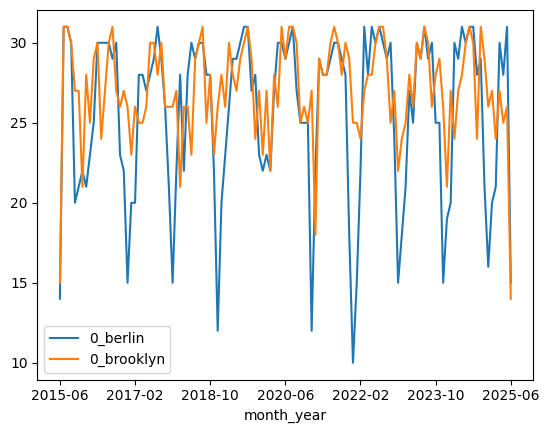

In [51]:
sun_merged.plot()

In [52]:
sun_merged.to_csv('processed/sun_hours.csv')

In [53]:
rain_brooklyn = df_brooklyn[df_brooklyn['rain'] >= 1].groupby('month_year').size().to_frame()
rain_berlin = df_berlin[df_berlin['rain'] >= 1].groupby('month_year').size().to_frame()
rain_merged = pd.merge(rain_berlin, rain_brooklyn, on='month_year', suffixes=('Berlin', 'Brooklyn'))

<Axes: xlabel='month_year'>

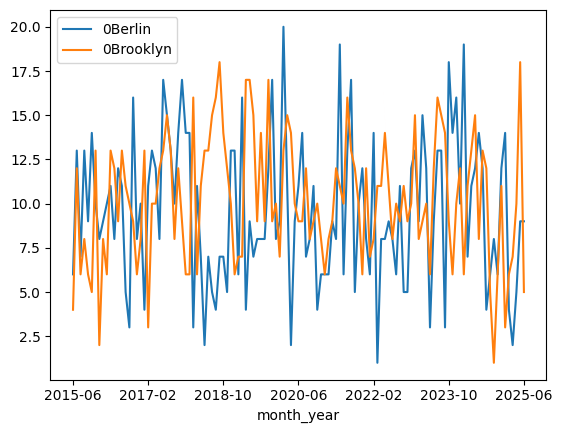

In [55]:
rain_merged.plot()

In [56]:
rain_merged.to_csv('processed/rain_hours.csv')

In [60]:
df_berlin.groupby('year')['rain'].sum()

year
2015    381.7
2016    490.4
2017    798.1
2018    381.5
2019    508.0
2020    531.4
2021    574.0
2022    472.1
2023    777.8
2024    628.8
2025    152.0
Name: rain, dtype: float64

<Axes: title={'center': 'Rain Sum per year Brooklyn'}, ylabel='year'>

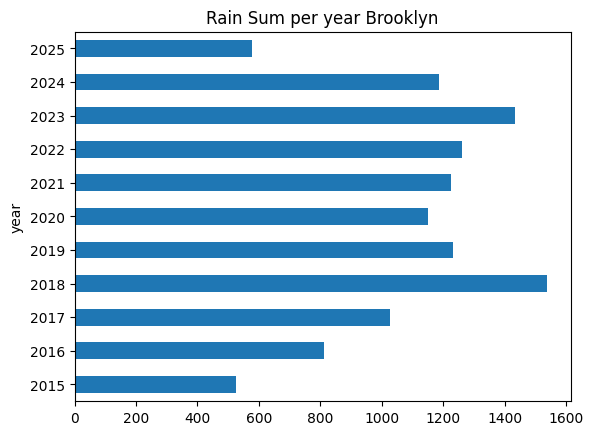

In [70]:
df_brooklyn.groupby('year')['rain'].sum().plot(kind='barh', title='Rain Sum per year Brooklyn')

<Axes: title={'center': 'Rain Sum per year Berlin'}, ylabel='year'>

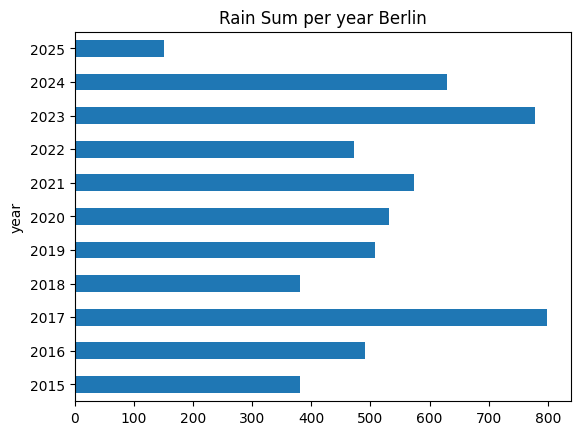

In [71]:
df_berlin.groupby('year')['rain'].sum().plot(kind='barh', title='Rain Sum per year Berlin')

In [72]:
df_berlin.groupby('year')['rain'].sum().to_frame()

,rain
year,
2015,381.7
2016,490.4
2017,798.1
2018,381.5
2019,508.0
2020,531.4
2021,574.0
2022,472.1
2023,777.8


In [80]:
combined = pd.concat([(df_berlin.groupby('year')['rain'].sum().to_frame().add_suffix('_berlin')),(df_brooklyn.groupby('year')['rain'].sum().to_frame().add_suffix('_nyc'))], axis=1)
combined.to_csv('rain_sum_year.csv') 

In [7]:
merged = pd.merge(df_berlin, df_brooklyn, on='day', suffixes=('_berlin', '_brooklyn'))

In [8]:
merged = merged.drop(['month_year_berlin', 'year_berlin', 'month_num_berlin', 'season_berlin'], axis=1)

In [9]:
(
    merged
    .rename(
        columns={
            'month_num_brooklyn' : 'month_num', 
            'season_brooklyn' : 'season', 
            'year_brooklyn' : 'year'
        },
        inplace=True
    )
)
            

In [10]:
merged

,day,temperature_berlin,rain_berlin,snowfall_berlin,sunshine_hours_berlin,rain_7d_avg_berlin,sunshine_7d_avg_berlin,snowfall_7d_avg_berlin,rain_30d_avg_berlin,sunshine_30d_avg_berlin,...,month_year_brooklyn,year,month_num,season,rain_7d_avg_brooklyn,sunshine_7d_avg_brooklyn,snowfall_7d_avg_brooklyn,rain_30d_avg_brooklyn,sunshine_30d_avg_brooklyn,snowfall_30d_avg_brooklyn
0,2015-06-16,12.3,0.0,0.0,4.752539,NaN,NaN,NaN,NaN,NaN,...,2015-06,2015,6,summer,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-06-17,15.2,0.5,0.0,12.985506,NaN,NaN,NaN,NaN,NaN,...,2015-06,2015,6,summer,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-06-18,15.9,4.2,0.0,8.459533,NaN,NaN,NaN,NaN,NaN,...,2015-06,2015,6,summer,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-06-19,14.3,0.1,0.0,14.672567,NaN,NaN,NaN,NaN,NaN,...,2015-06,2015,6,summer,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-06-20,13.8,3.1,0.0,12.960872,NaN,NaN,NaN,NaN,NaN,...,2015-06,2015,6,summer,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2025-06-11,15.8,0.9,0.0,13.343106,3.757143,11.430383,0.0,1.803333,11.189273,...,2025-06,2025,6,summer,4.514286,8.479926,0.0,5.690000,8.515550,0.0
3649,2025-06-12,16.8,0.0,0.0,15.379931,3.542857,12.014425,0.0,1.803333,11.233283,...,2025-06,2025,6,summer,4.514286,8.541364,0.0,5.630000,8.975947,0.0
3650,2025-06-13,19.1,0.0,0.0,15.390986,3.328571,12.760465,0.0,1.803333,11.289381,...,2025-06,2025,6,summer,4.528571,8.396530,0.0,4.730000,9.330455,0.0
3651,2025-06-14,23.4,0.0,0.0,15.412967,2.557143,13.012781,0.0,1.776667,11.359054,...,2025-06,2025,6,summer,4.214286,7.980778,0.0,4.693333,9.063802,0.0


<Axes: xlabel='day', ylabel='[temperature_brooklyn]'>

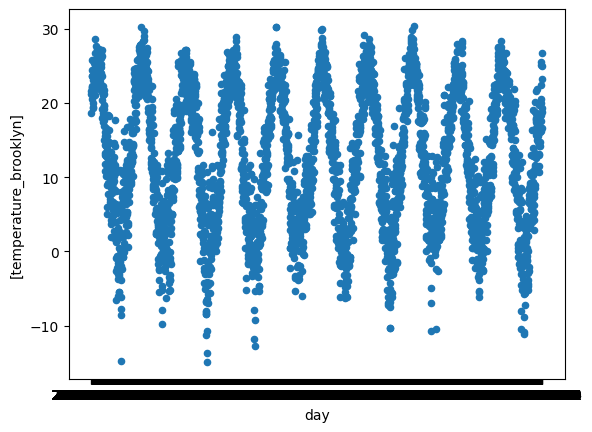

In [12]:
merged.plot(x='day', y=['temperature_brooklyn'], kind='scatter')

In [ ]:
merged.to_csv('processed/weather_fulldata.csv')